In [ ]:
!pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
movies=pd.read_csv("/content/drive/MyDrive/EDA Project/movies.dat", sep="::", header=None, encoding='latin-1', names=["MovieID","Title","Genre"])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
movies.head() #movies dat file

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(3883, 3)

In [ ]:
users=pd.read_csv("/content/drive/MyDrive/EDA Project/users.dat", sep="::", header=None,encoding='latin-1', engine='python', names=['UserID','Gender','Age', 'Occupation', 'Zip-code'])

In [ ]:
users.head() #users dat file

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.shape

(6040, 5)

In [ ]:
ratings=pd.read_csv("/content/drive/MyDrive/EDA Project/ratings.dat", sep="::", header=None,encoding='latin-1', engine='python', names=['MovieID','UserID','Rating','Timestamp'])

In [ ]:
ratings.head() #ratings dat file

,MovieID,UserID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.shape

(1000209, 4)

#Merging dataframes

In [ ]:
movie_rating=pd.merge(movies, ratings, on='MovieID',how='outer')
user_rating=pd.merge(users, ratings, on='UserID',how='outer')

In [ ]:
movie_rating.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1193,5,978300760
1,1,Toy Story (1995),Animation|Children's|Comedy,661,3,978302109
2,1,Toy Story (1995),Animation|Children's|Comedy,914,3,978301968
3,1,Toy Story (1995),Animation|Children's|Comedy,3408,4,978300275
4,1,Toy Story (1995),Animation|Children's|Comedy,2355,5,978824291


In [ ]:
movie_rating.shape

(1000209, 6)

In [ ]:
movie_rating["Title"].value_counts()

Sliding Doors (1998)                                 1850
Hamlet (1948)                                        1595
Shooter, The (1995)                                  1521
1-900 (1994)                                         1518
Small Time Crooks (2000)                             1344
                                                     ... 
Fantastic Night, The (La Nuit Fantastique) (1949)      20
Black Beauty (1994)                                    20
Scream 3 (2000)                                        20
Relative Fear (1994)                                   20
Foreign Student (1994)                                 20
Name: Title, Length: 3883, dtype: int64

In [ ]:
user_rating.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1.0,5.0,978824268.0
1,1,F,1,10,48067,6.0,4.0,978237008.0
2,1,F,1,10,48067,8.0,4.0,978233496.0
3,1,F,1,10,48067,9.0,5.0,978225952.0
4,1,F,1,10,48067,10.0,5.0,978226474.0


In [ ]:
user_rating.shape

(1002543, 8)

#Creation of Master Data Frame

In [ ]:
master_data=pd.merge(movie_rating, user_rating, on=['MovieID','UserID','Rating','Timestamp'])

In [ ]:
master_data.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1193,5,978300760,M,25,12,90712
1,1,Toy Story (1995),Animation|Children's|Comedy,661,3,978302109,M,45,1,13114
2,1,Toy Story (1995),Animation|Children's|Comedy,914,3,978301968,F,35,9,30338
3,1,Toy Story (1995),Animation|Children's|Comedy,3408,4,978300275,M,25,17,14830
4,1,Toy Story (1995),Animation|Children's|Comedy,2355,5,978824291,F,45,9,13203


In [ ]:
master_data=master_data.drop(columns=['Genre','Timestamp','Zip-code'])
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1193,5,M,25,12
1,1,Toy Story (1995),661,3,M,45,1
2,1,Toy Story (1995),914,3,F,35,9
3,1,Toy Story (1995),3408,4,M,25,17
4,1,Toy Story (1995),2355,5,F,45,9


In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       645833 non-null   object
 2   UserID      1000209 non-null  int64 
 3   Rating      1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [ ]:
master_data.shape

(1000209, 7)

#User-Age Distribution


In [ ]:
user_age=master_data[['UserID','Age']]
user_age.sample(5)

,UserID,Age
231597,2016,56
659386,785,18
272213,2710,35
349800,3793,18
33198,3005,25


In [ ]:
user_age['Age'].value_counts()

25    320136
35    204160
18    198761
50     94931
45     74773
56     64431
1      43017
Name: Age, dtype: int64

In [ ]:
user_age['Age'].unique()

array([25, 45, 35, 50, 56, 18,  1])

In [ ]:
user_age['UserID'].value_counts().head()

2858    3428
260     2991
1196    2990
1210    2883
480     2672
Name: UserID, dtype: int64

In [ ]:
user_age_dist=user_age.groupby(['Age']).size().reset_index().rename(columns={0:"Counts"})

In [ ]:
user_age_dist

,Age,Counts
0,1,43017
1,18,198761
2,25,320136
3,35,204160
4,45,74773
5,50,94931
6,56,64431


In [ ]:
user_age_dist=user_age_dist.sort_values(by='Counts', ascending=False)
user_age_dist

,Age,Counts
2,25,320136
3,35,204160
1,18,198761
5,50,94931
4,45,74773
6,56,64431
0,1,43017


In [ ]:
type(user_age_dist)

pandas.core.frame.DataFrame

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Text(0.5, 1.0, 'User_Age Distribution ')

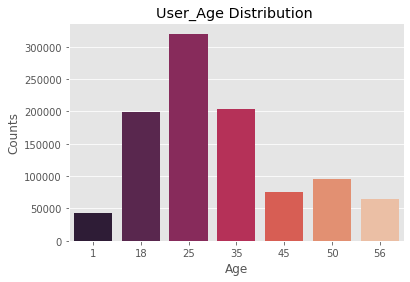

In [ ]:
plt.style.use('ggplot')
sns.barplot(x='Age', y='Counts', palette='rocket',data=user_age_dist)
plt.title("User_Age Distribution ")

#User rating of movie Toy Story

In [ ]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1193,5,M,25,12
1,1,Toy Story (1995),661,3,M,45,1
2,1,Toy Story (1995),914,3,F,35,9
3,1,Toy Story (1995),3408,4,M,25,17
4,1,Toy Story (1995),2355,5,F,45,9


In [ ]:
movie_rating.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1193,5,978300760
1,1,Toy Story (1995),Animation|Children's|Comedy,661,3,978302109
2,1,Toy Story (1995),Animation|Children's|Comedy,914,3,978301968
3,1,Toy Story (1995),Animation|Children's|Comedy,3408,4,978300275
4,1,Toy Story (1995),Animation|Children's|Comedy,2355,5,978824291


In [ ]:
Rating_mean=master_data[master_data["Title"]=='Toy Story (1995)']

In [ ]:
Rating_mean.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1193,5,M,25,12
1,1,Toy Story (1995),661,3,M,45,1
2,1,Toy Story (1995),914,3,F,35,9
3,1,Toy Story (1995),3408,4,M,25,17
4,1,Toy Story (1995),2355,5,F,45,9


In [ ]:
pd.set_option("display.max_rows", None)

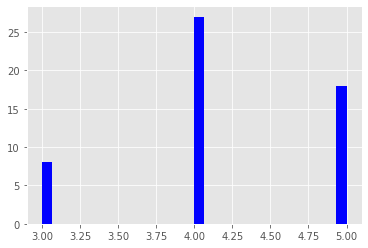

In [ ]:
plt.hist(x=Rating_mean.Rating, color='b',bins=30);
plt.show()

# Top-25 Movies

In [ ]:
top_25=master_data.groupby(['Title']) [['Rating']].mean().reset_index()

In [ ]:
top_25=top_25.sort_values(by='Rating', ascending=False)

In [ ]:
top_25

,Title,Rating
2460,New Jersey Drive (1995),4.962963
1713,I'll Be Home For Christmas (1998),4.956522
1027,Drowning Mona (2000),4.904762
1446,Goya in Bordeaux (Goya en Bodeos) (1999),4.890909
1164,Farewell My Concubine (1993),4.843137
1181,"Favor, The (1994)",4.837838
1826,Jean de Florette (1986),4.796117
3519,Tigrero: A Film That Was Never Made (1994),4.733333
3751,Welcome To Sarajevo (1997),4.714286
2072,Lord of the Flies (1963),4.702703


In [ ]:
top_25M=top_25[:25]

In [ ]:
top_25M

,Title,Rating
2460,New Jersey Drive (1995),4.962963
1713,I'll Be Home For Christmas (1998),4.956522
1027,Drowning Mona (2000),4.904762
1446,Goya in Bordeaux (Goya en Bodeos) (1999),4.890909
1164,Farewell My Concubine (1993),4.843137
1181,"Favor, The (1994)",4.837838
1826,Jean de Florette (1986),4.796117
3519,Tigrero: A Film That Was Never Made (1994),4.733333
3751,Welcome To Sarajevo (1997),4.714286
2072,Lord of the Flies (1963),4.702703


<function matplotlib.pyplot.tight_layout>

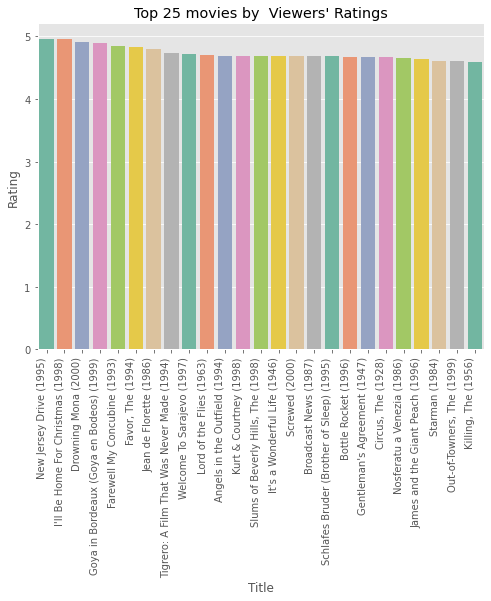

In [ ]:
plt.figure(figsize=[8,6])
sns.barplot(x='Title',y='Rating', data=top_25M, palette='Set2');
plt.title("Top 25 movies by  Viewers' Ratings");
plt.xticks(rotation=90, ha="right");
plt.tight_layout

#Top 25 movies by viewership count

In [ ]:
movie_rating.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1193,5,978300760
1,1,Toy Story (1995),Animation|Children's|Comedy,661,3,978302109
2,1,Toy Story (1995),Animation|Children's|Comedy,914,3,978301968
3,1,Toy Story (1995),Animation|Children's|Comedy,3408,4,978300275
4,1,Toy Story (1995),Animation|Children's|Comedy,2355,5,978824291


In [ ]:
Timecount25=movie_rating.groupby(['Title']) ['Timestamp'].count().reset_index()

In [ ]:
Timecount25.head()

,Title,Timestamp
0,"$1,000,000 Duck (1971)",225
1,'Night Mother (1986),213
2,'Til There Was You (1997),48
3,"'burbs, The (1989)",205
4,...And Justice for All (1979),220


In [ ]:
Timecount25= Timecount25.sort_values(by=["Timestamp"], ascending=False)
Timecount25.head(25)

,Title,Timestamp
3176,Sliding Doors (1998),1850
1511,Hamlet (1948),1595
3124,"Shooter, The (1995)",1521
5,1-900 (1994),1518
3187,Small Time Crooks (2000),1344
3084,Seventh Heaven (Le Septième ciel) (1997),1323
2915,"Return of Martin Guerre, The (Retour de Martin...",1302
1633,Homeward Bound: The Incredible Journey (1993),1286
1306,Friday the 13th Part VII: The New Blood (1988),1260
1224,"Five Wives, Three Secretaries and Me (1998)",1258


In [ ]:
Timecount25=Timecount25[:25]
Timecount25.head()

,Title,Timestamp
3176,Sliding Doors (1998),1850
1511,Hamlet (1948),1595
3124,"Shooter, The (1995)",1521
5,1-900 (1994),1518
3187,Small Time Crooks (2000),1344


<function matplotlib.pyplot.tight_layout>

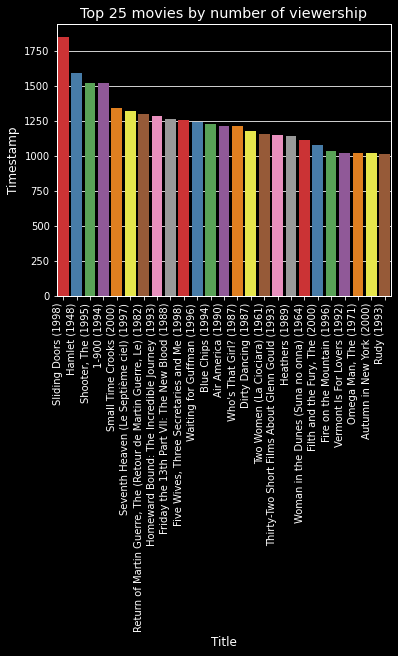

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=[6,5])
sns.barplot(x='Title',y='Timestamp', data=Timecount25, palette='Set1');
plt.title("Top 25 movies by number of viewership");
plt.xticks(rotation=90, ha="right");
plt.tight_layout

# Movies reviewed by the user ID=2696

In [ ]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1193,5,M,25,12
1,1,Toy Story (1995),661,3,M,45,1
2,1,Toy Story (1995),914,3,F,35,9
3,1,Toy Story (1995),3408,4,M,25,17
4,1,Toy Story (1995),2355,5,F,45,9


In [ ]:
user_2696=master_data[master_data.UserID==2696]
user_2696

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
16682,131,Frankie Starlight (1995),2696,4,M,25,7
20071,149,Amateur (1994),2696,5,M,25,7
31513,214,Before the Rain (Pred dozhdot) (1994),2696,4,M,25,7
61655,415,Another Stakeout (1993),2696,4,M,25,7
84846,553,Tombstone (1993),2696,4,M,25,7
111539,731,Heaven's Prisoners (1996),2696,3,M,25,7
136778,889,1-900 (1994),2696,2,M,25,7
164977,1059,William Shakespeare's Romeo and Juliet (1996),2696,3,M,25,7
169787,1088,Dirty Dancing (1987),2696,4,M,25,7
186482,1168,Bad Moon (1996),2696,3,M,25,7


In [ ]:
type(user_2696)

pandas.core.frame.DataFrame

In [ ]:
user_2696.shape

(81, 7)

In [ ]:
user_2696=user_2696.sort_values(by=['Rating'],ascending=False)
user_2696.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
646402,677,NaN,2696,5,M,25,7
258830,1609,187 (1997),2696,5,M,25,7
561551,3505,No Way Out (1987),2696,5,M,25,7
685202,4095,NaN,2696,5,M,25,7
703839,4220,NaN,2696,5,M,25,7


In [ ]:
user_2696= user_2696.dropna()

In [ ]:
user_2696

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
258830,1609,187 (1997),2696,5,M,25,7
561551,3505,No Way Out (1987),2696,5,M,25,7
465429,2918,Ferris Bueller's Day Off (1986),2696,5,M,25,7
432360,2724,Runaway Bride (1999),2696,5,M,25,7
287130,1752,Hard Rain (1998),2696,5,M,25,7
272958,1680,Sliding Doors (1998),2696,5,M,25,7
20071,149,Amateur (1994),2696,5,M,25,7
199176,1242,Glory (1989),2696,5,M,25,7
636036,3889,Highlander: Endgame (2000),2696,4,M,25,7
16682,131,Frankie Starlight (1995),2696,4,M,25,7


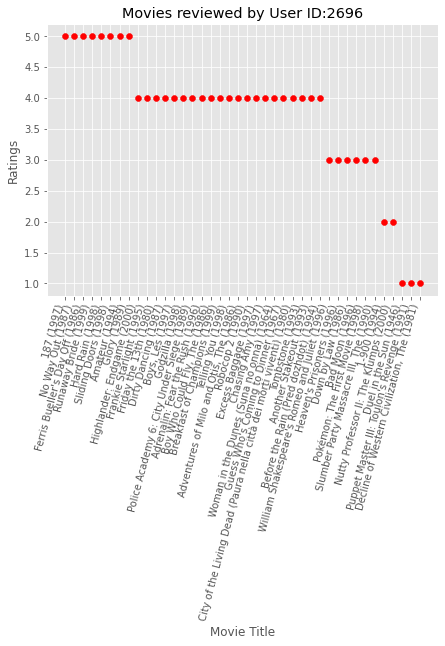

In [ ]:
plt.figure(figsize=(7,5))

plt.scatter(user_2696['Title'], user_2696['Rating'], color='r')
plt.xlabel("Movie Title")
plt.ylabel("Ratings")
plt.title("Movies reviewed by User ID:2696")
plt.xticks(rotation=75,ha='right')
plt.show()

In [ ]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1193,5,M,25,12
1,1,Toy Story (1995),661,3,M,45,1
2,1,Toy Story (1995),914,3,F,35,9
3,1,Toy Story (1995),3408,4,M,25,17
4,1,Toy Story (1995),2355,5,F,45,9


One-Hot Encoding for column 'Genre'

In [ ]:
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
import numpy as np

In [ ]:
genre=movies['Genre'].tolist()

In [ ]:
genre

["Animation|Children's|Comedy",
 "Adventure|Children's|Fantasy",
 'Comedy|Romance',
 'Comedy|Drama',
 'Comedy',
 'Action|Crime|Thriller',
 'Comedy|Romance',
 "Adventure|Children's",
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Drama|Romance',
 'Comedy|Horror',
 "Animation|Children's",
 'Drama',
 'Action|Adventure|Romance',
 'Drama|Thriller',
 'Drama|Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action|Comedy|Drama',
 'Crime|Drama|Thriller',
 'Thriller',
 'Drama|Sci-Fi',
 'Drama|Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure|Sci-Fi',
 'Drama',
 'Drama',
 'Drama|Sci-Fi',
 'Adventure|Romance',
 "Children's|Comedy|Drama",
 'Drama|Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy|Romance',
 'Drama',
 'Drama|War',
 'Action|Crime|Drama',
 'Drama',
 'Action|Adventure',
 'Comedy|Drama',
 'Drama|Romance',
 'Crime|Thriller',
 "Animation|Children's|Musical|Romance",
 'Drama|Romance',
 'Crime|Thriller',
 'Action|Drama|Thriller',
 'Comedy',
 'Drama',
 "Children's|Comedy",
 'Drama'

## Separating Unique Genre

In [ ]:
Genre=[]

i=0

while(i<len(genre)):
    
    Genre=Genre+genre[i].split("|")
    i+=1
    


In [ ]:
Unique_Genre=set(Genre)

In [ ]:
Unique_Genre

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [ ]:
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
Unique_Genre=list(Unique_Genre)

In [ ]:
Unique_Genre=pd.DataFrame(Unique_Genre)

In [ ]:
Unique_Genre

,0
0,Romance
1,Fantasy
2,Musical
3,Comedy
4,Horror
5,Documentary
6,Adventure
7,War
8,Film-Noir
9,Western


In [ ]:
dummies=pd.get_dummies(Unique_Genre)

Required dummy column for Genre as mentioned in the problem statement:

In [ ]:
dummies

,0_Action,0_Adventure,0_Animation,0_Children's,0_Comedy,0_Crime,0_Documentary,0_Drama,0_Fantasy,0_Film-Noir,0_Horror,0_Musical,0_Mystery,0_Romance,0_Sci-Fi,0_Thriller,0_War,0_Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dummies.shape

(18, 18)

The shape of this dummy encoding is a concern & can't be concatenated with the 'feature DF' for further model building

# Feature Engineering:

In [ ]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1193,5,M,25,12
1,1,Toy Story (1995),661,3,M,45,1
2,1,Toy Story (1995),914,3,F,35,9
3,1,Toy Story (1995),3408,4,M,25,17
4,1,Toy Story (1995),2355,5,F,45,9


In [ ]:
DF=master_data.drop(['MovieID','Title','UserID'], axis=1)
DF.head()

,Rating,Gender,Age,Occupation
0,5,M,25,12
1,3,M,45,1
2,3,F,35,9
3,4,M,25,17
4,5,F,45,9


In [ ]:
Genre=movie_rating['Genre']
Genre=Genre.str.get_dummies().add_prefix('Genre_')
Genre.sample(5)

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
190985,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
307377,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
888562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
775964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
848642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
DF1=pd.concat((DF, Genre), axis=1)
pd.set_option('display.max_columns', None)
DF1.reindex(DF.index)
DF1.head(25)

,Rating,Gender,Age,Occupation,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,5,M,25,12,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,M,45,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,F,35,9,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,M,25,17,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,F,45,9,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3,M,35,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5,F,50,7,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,5,F,35,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,F,56,13,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4,F,35,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
DF1=pd.get_dummies(DF1, columns=['Gender'])
DF1.head()

,Rating,Age,Occupation,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Gender_F,Gender_M
0,5,25,12,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,45,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,35,9,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,25,17,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,45,9,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
DF1.shape

(1000209, 23)

In [ ]:
Feature_DF=DF1.drop(['Rating'],axis=1) #Feature Data Frame

# Features affecting rating of a particular movie:

In [ ]:
print("Features Affecting ratings of a movie are:", Feature_DF.dtypes)

Features Affecting ratings of a movie are: Age                  int64
Occupation           int64
Genre_Action         int64
Genre_Adventure      int64
Genre_Animation      int64
Genre_Children's     int64
Genre_Comedy         int64
Genre_Crime          int64
Genre_Documentary    int64
Genre_Drama          int64
Genre_Fantasy        int64
Genre_Film-Noir      int64
Genre_Horror         int64
Genre_Musical        int64
Genre_Mystery        int64
Genre_Romance        int64
Genre_Sci-Fi         int64
Genre_Thriller       int64
Genre_War            int64
Genre_Western        int64
Gender_F             uint8
Gender_M             uint8
dtype: object


# Model Building

In [ ]:
y=DF1['Rating'] #Assigning Target

In [ ]:
y.shape

(1000209,)

In [ ]:
x=Feature_DF #Assigning Features
x.head()

,Age,Occupation,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Gender_F,Gender_M
0,25,12,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,45,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,35,9,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,25,17,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,45,9,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
x.shape

(1000209, 22)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics


In [ ]:
linReg= LinearRegression()

In [ ]:
linReg.fit(x,y)

LinearRegression()

In [ ]:


x_train, x_test, y_train, y_test= train_test_split(x,y)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(750156, 22) (250053, 22) (750156,) (250053,)


In [ ]:
linReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = linReg.predict(x_test)

# Evaluation

In [ ]:
print("mean squared error : %.2f " % np.mean((linReg.predict(x_test)- y_test)**2))

mean squared error : 1.24 


In [ ]:
print('Mean Abs Error  MAE: %.2f '% metrics.mean_absolute_error(y_test, y_pred))

Mean Abs Error  MAE: 0.93 


In [ ]:
print('Root Mean Sq Error RMSE:%.2f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Sq Error RMSE:1.11


In [ ]:
print('r2 value:%.4f '% metrics.r2_score(y_test, y_pred))

r2 value:0.0025 


In [ ]:
print('y-intercept: ', linReg.intercept_)


y-intercept:  3.642652999172581


In [ ]:
print('Beta coefficients: ', linReg.coef_)

Beta coefficients:  [-0.00056145 -0.0017081  -0.06505647  0.01368203  0.02943827 -0.0343927
 -0.01418848  0.00264338  0.00990175  0.00729666 -0.06439648 -0.06934135
 -0.02318907 -0.04121027  0.01692249 -0.05894722  0.02040029  0.05177546
 -0.04847278  0.04703981  0.04581784 -0.04581784]


In [ ]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head()

,Test,Prediction
795023,3,3.579193
227151,3,3.565004
877984,5,3.579193
501087,4,3.606759
605377,4,3.563903
